## UNSUPERVISED MACHINE LEARNING - Task 3 (Clustering)

### TASK - To predict the optimum number of clusters and represent it visually for a given 'Iris' dataset

In [123]:
## Importing initial required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [124]:
## Reading the dataset into a dataframe 
iris_set = pd.read_csv('Iris.csv')

## Visualizing the dataset for a crosscheck before processing
iris_set.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [125]:
print (f'shape of Iris data is {iris_set.shape}')
print (f'length of Iris data is {len(iris_set)}')

shape of Iris data is (150, 6)
length of Iris data is 150


### Data Analysis

In [126]:
iris_set.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [127]:
iris_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [128]:
iris_set.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [129]:
iris_set['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

### Data Visualization

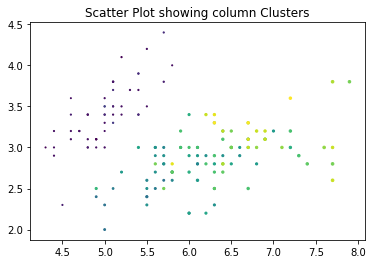

In [144]:
plt.scatter(iris_set['SepalLengthCm'], iris_set['SepalWidthCm'], iris_set['PetalLengthCm'], iris_set['PetalWidthCm'])
plt.title('Scatter Plot showing column Clusters')
plt.show()

### Finding optimal number of clusters for KMeans through Elbow Method

In [131]:
#Turn the Iris dataframe into an array for easy analysis
x = iris_set.iloc[:, [1,2,3,4]].values

In [132]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

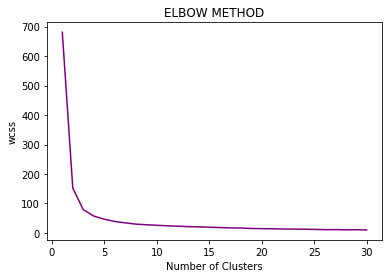

In [134]:
# Let's form our elbow graph with sklearn's KMeans inertia_ lol
from sklearn.cluster import KMeans
wcss = []
for i in range (1,31):
    model = KMeans(i)
    model.fit(x)
    wcss.append(model.inertia_)
plt.plot(range(1,31), wcss, color='purple')
plt.title('ELBOW METHOD')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

### Predicting Model

In [157]:
model = KMeans(3)
y = model.fit_predict(x)

### Visualizing Clusters

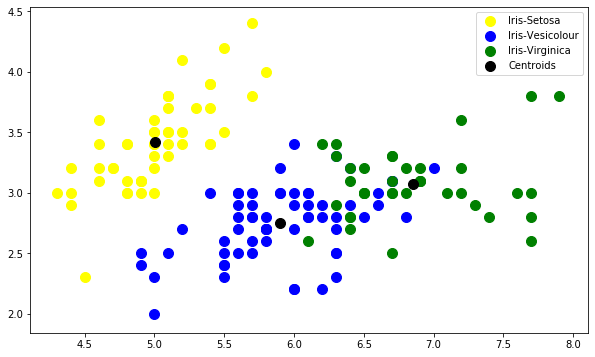

In [158]:
fig=plt.figure(figsize=(10,6))
plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 100, c = 'yellow', label = 'Iris-Setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 100, c = 'blue', label = 'Iris-Vesicolour')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s = 100, c = 'green', label = 'Iris-Virginica')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()

In [120]:
# #Let us label the 'Species' column of our Iris data
# from sklearn import preprocessing
# label_enc = preprocessing.LabelEncoder()
# iris_set['Species'] = label_enc.fit_transform(iris_set['Species'])
# iris_set

In [121]:
# #Removing the 'Id' column 
# iris_set.drop(labels=['Id'], axis=1, inplace=True)

# #Reanalyzing to crosscheck
# iris_set